In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
data = pd.read_csv('housing.csv')

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data.dropna(inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [6]:
from sklearn.model_selection import train_test_split
import scipy.linalg


X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
train_data = X_train.join(y_train)

In [9]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
10681,-117.76,33.53,18.0,3224.0,561.0,1310.0,580.0,8.4614,<1H OCEAN,391900.0
11156,-117.98,33.84,31.0,1252.0,225.0,714.0,226.0,4.6042,<1H OCEAN,220700.0
15115,-117.01,32.85,23.0,2592.0,414.0,1401.0,431.0,5.4903,<1H OCEAN,151400.0
679,-122.15,37.68,35.0,2632.0,447.0,1349.0,486.0,4.3864,NEAR BAY,205200.0
12131,-117.22,33.93,14.0,5104.0,1026.0,3513.0,972.0,3.2148,INLAND,117000.0
...,...,...,...,...,...,...,...,...,...,...
13361,-117.61,34.01,25.0,352.0,41.0,99.0,34.0,3.9696,INLAND,500000.0
5575,-118.31,33.84,5.0,3559.0,869.0,2965.0,794.0,2.6491,<1H OCEAN,216700.0
16401,-121.23,37.98,27.0,849.0,137.0,373.0,131.0,5.0362,INLAND,181300.0
6770,-118.15,34.11,52.0,2375.0,369.0,930.0,351.0,7.4111,<1H OCEAN,469100.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

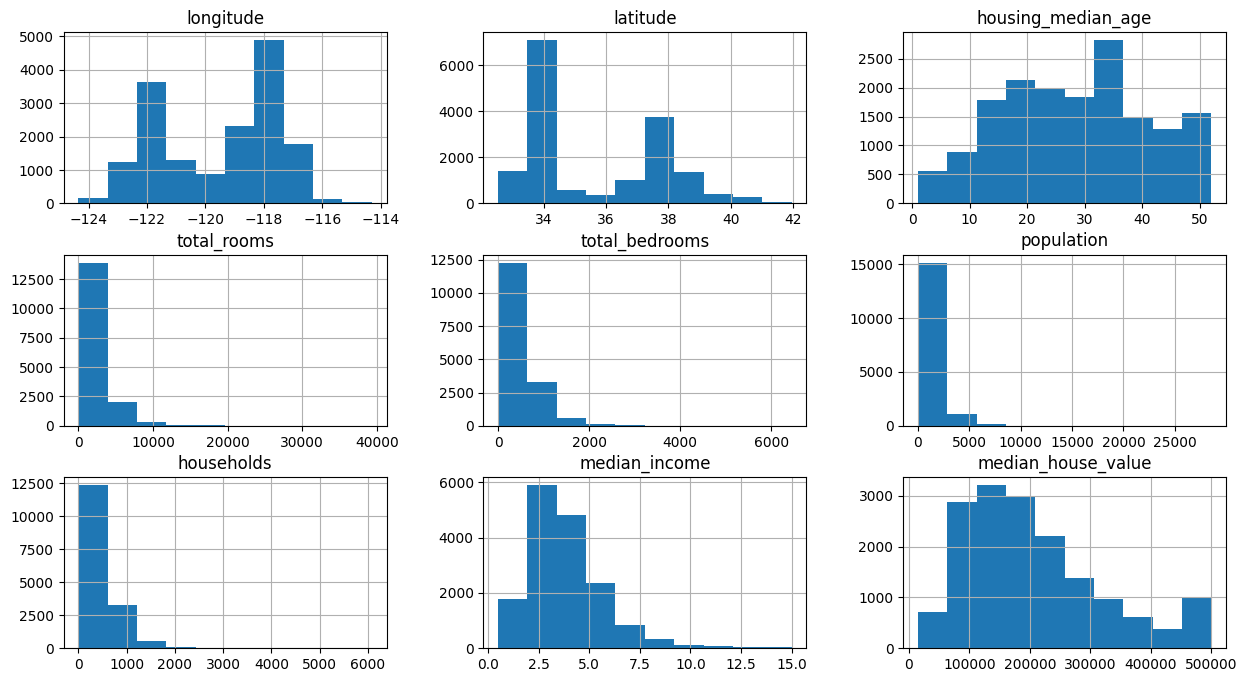

In [10]:
train_data.hist(figsize=(15, 8))

In [11]:
plt.figure(figsize=(15, 8))


<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>

In [12]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)


In [13]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
10681,-117.76,33.53,18.0,8.078688,6.331502,7.178545,6.364751,8.4614,<1H OCEAN,391900.0
11156,-117.98,33.84,31.0,7.133296,5.420535,6.572283,5.424950,4.6042,<1H OCEAN,220700.0
15115,-117.01,32.85,23.0,7.860571,6.028279,7.245655,6.068426,5.4903,<1H OCEAN,151400.0
679,-122.15,37.68,35.0,7.875879,6.104793,7.207860,6.188264,4.3864,NEAR BAY,205200.0
12131,-117.22,33.93,14.0,8.537976,6.934397,8.164510,6.880384,3.2148,INLAND,117000.0
...,...,...,...,...,...,...,...,...,...,...
13361,-117.61,34.01,25.0,5.866468,3.737670,4.605170,3.555348,3.9696,INLAND,500000.0
5575,-118.31,33.84,5.0,8.177516,6.768493,7.994970,6.678342,2.6491,<1H OCEAN,216700.0
16401,-121.23,37.98,27.0,6.745236,4.927254,5.924256,4.882802,5.0362,INLAND,181300.0
6770,-118.15,34.11,52.0,7.773174,5.913503,6.836259,5.863631,7.4111,<1H OCEAN,469100.0


In [14]:
train_data=train_data.join(pd.get_dummies(train_data['ocean_proximity'])).drop('ocean_proximity', axis=1)

In [15]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
10681,-117.76,33.53,18.0,8.078688,6.331502,7.178545,6.364751,8.4614,391900.0,True,False,False,False,False
11156,-117.98,33.84,31.0,7.133296,5.420535,6.572283,5.424950,4.6042,220700.0,True,False,False,False,False
15115,-117.01,32.85,23.0,7.860571,6.028279,7.245655,6.068426,5.4903,151400.0,True,False,False,False,False
679,-122.15,37.68,35.0,7.875879,6.104793,7.207860,6.188264,4.3864,205200.0,False,False,False,True,False
12131,-117.22,33.93,14.0,8.537976,6.934397,8.164510,6.880384,3.2148,117000.0,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13361,-117.61,34.01,25.0,5.866468,3.737670,4.605170,3.555348,3.9696,500000.0,False,True,False,False,False
5575,-118.31,33.84,5.0,8.177516,6.768493,7.994970,6.678342,2.6491,216700.0,True,False,False,False,False
16401,-121.23,37.98,27.0,6.745236,4.927254,5.924256,4.882802,5.0362,181300.0,False,True,False,False,False
6770,-118.15,34.11,52.0,7.773174,5.913503,6.836259,5.863631,7.4111,469100.0,True,False,False,False,False


<Axes: >

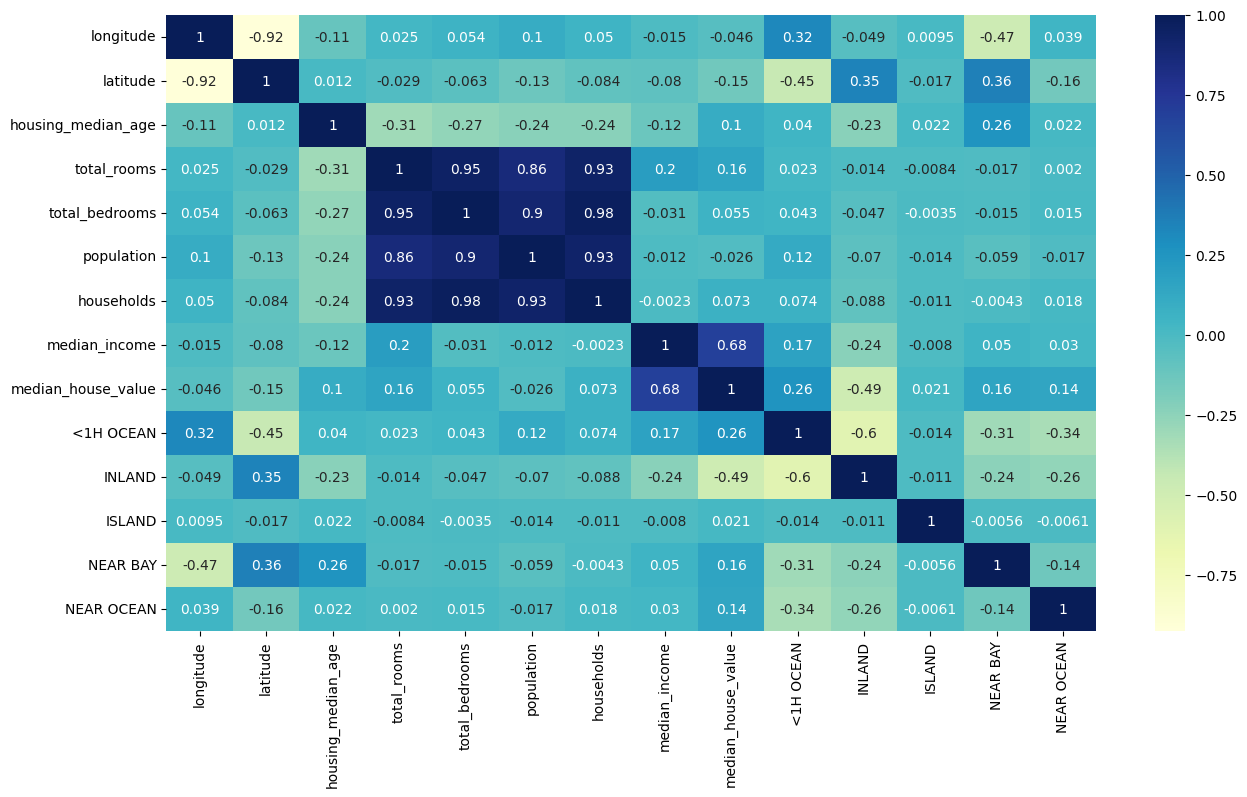

In [16]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True,cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

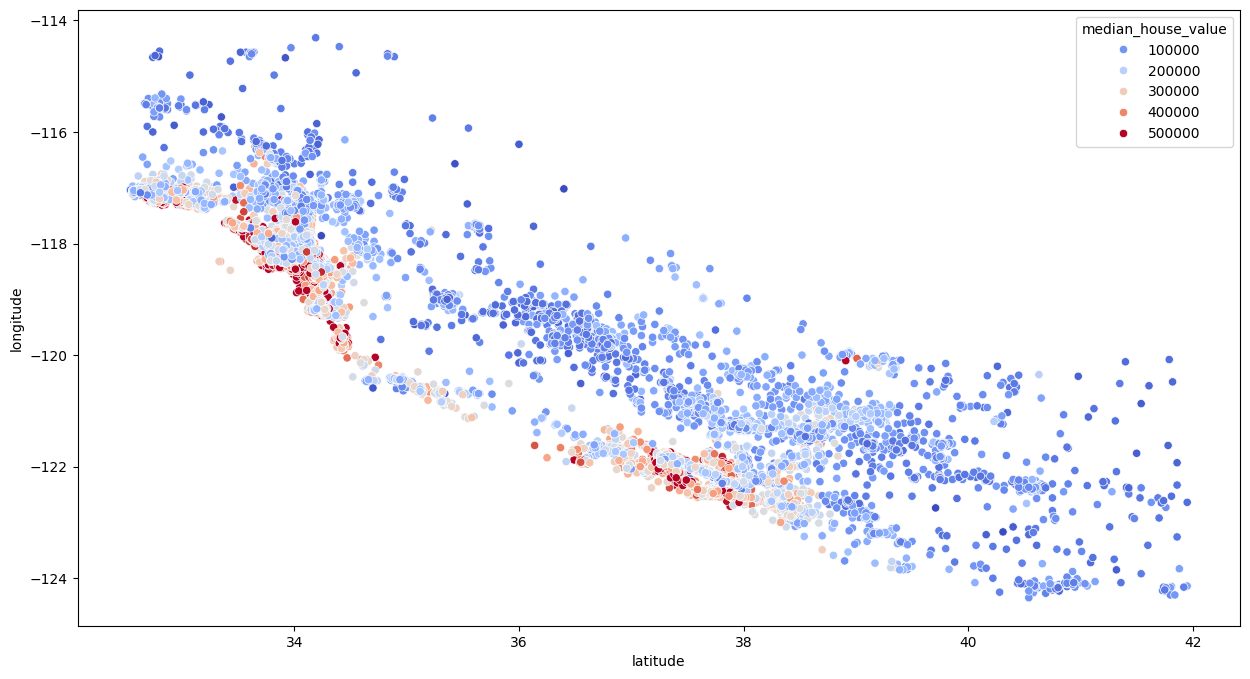

In [17]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x="latitude", y="longitude",data=train_data, hue='median_house_value',palette='coolwarm')

In [18]:
train_data["bedroom_ratio"] = train_data["total_bedrooms"] / train_data["total_rooms"]
train_data["household_rooms"] = train_data["total_rooms"] / train_data["households"]


<Axes: >

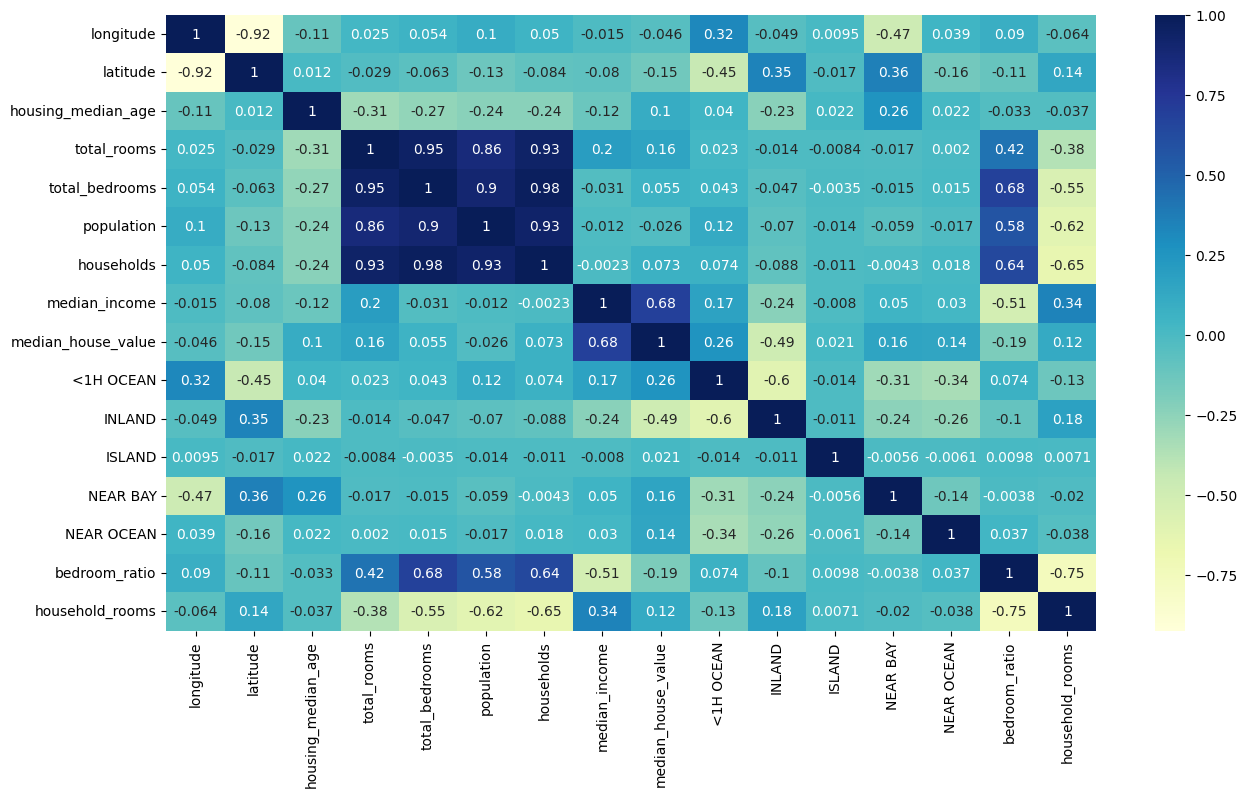

In [19]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True,cmap="YlGnBu")

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


X_train,y_train = train_data.drop('median_house_value', axis=1), train_data['median_house_value']

reg = LinearRegression()
reg.fit(X_train, y_train)


LinearRegression()

In [21]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data=test_data.join(pd.get_dummies(test_data['ocean_proximity'])).drop('ocean_proximity', axis=1)

test_data["bedroom_ratio"] = test_data["total_bedrooms"] / test_data["total_rooms"]
test_data["household_rooms"] = test_data["total_rooms"] / test_data["households"]



In [22]:
X_test, y_test = test_data.drop('median_house_value', axis=1), test_data['median_house_value']


In [23]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
6443,-118.03,34.10,32.0,7.889459,6.413459,7.321850,6.295266,2.9422,233100.0,False,True,False,False,False,0.812915,1.253237
12364,-116.46,33.82,6.0,8.489616,6.825460,8.010028,6.720220,3.9508,104200.0,False,True,False,False,False,0.803977,1.263294
6873,-118.10,34.08,21.0,7.207860,5.866468,7.080868,5.802118,2.5000,182100.0,True,False,False,False,False,0.813899,1.242281
18805,-121.67,40.61,8.0,7.788212,6.139885,6.668228,5.697093,2.1513,80400.0,False,True,False,False,False,0.788356,1.367050
18270,-122.08,37.36,31.0,7.907652,5.932245,6.909753,5.945421,9.2810,500001.0,False,False,False,True,False,0.750191,1.330041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5762,-118.29,34.16,31.0,7.141245,5.826000,6.927558,5.808142,3.7083,241900.0,True,False,False,False,False,0.815824,1.229523
239,-122.20,37.79,45.0,7.611842,6.270988,7.252054,6.175867,2.7788,115400.0,False,False,False,True,False,0.823846,1.232514
8323,-118.30,33.95,27.0,7.481556,6.098074,7.392032,5.998937,2.2031,96900.0,True,False,False,False,False,0.815081,1.247147
9287,-122.55,38.07,38.0,8.129470,6.565265,7.546974,6.570883,3.0573,350800.0,False,False,False,True,False,0.807588,1.237196


In [24]:
reg.score(X_test, y_test)

0.6691821804693558

In [26]:
from xgboost import XGBRegressor
import scipy.linalg

Scaler = StandardScaler()

X_train_s = Scaler.fit_transform(X_train)
X_test_s = Scaler.transform(X_test)

forest = XGBRegressor(tree_method='gpu_hist')  # Specify GPU usage

forest.fit(X_train_s, y_train)


e:\HousePricePrediction\houseprice\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:52:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [27]:
forest.score(X_test_s, y_test)

e:\HousePricePrediction\houseprice\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:52:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
e:\HousePricePrediction\houseprice\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:52:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the 

0.8233355090234014

In [32]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

param_grid = {
    "n_estimators": [10, 50, 100, 200],
    "max_depth": [3, 6, 9],  # Added max_depth as a parameter to tune
    "learning_rate": [0.01, 0.1, 0.2]  # Added learning_rate as a parameter to tune
}

# Instantiate the XGBRegressor with the device set to CUDA
xgb_regressor = XGBRegressor(device='cuda')

grid_search = GridSearchCV(xgb_regressor, param_grid, cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True,
                           n_jobs=1  # Set to 1 to avoid conflicts with GPU
                           )

grid_search.fit(X_train_s, y_train)


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device='cuda',
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 6, 9],
                         'n_estimators': [10, 50, 100, 200]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [33]:
best_forest = grid_search.best_estimator_

In [34]:
best_forest.score(X_test_s, y_test) 

0.8330109785874376

The predicted house price is: 279190.21875


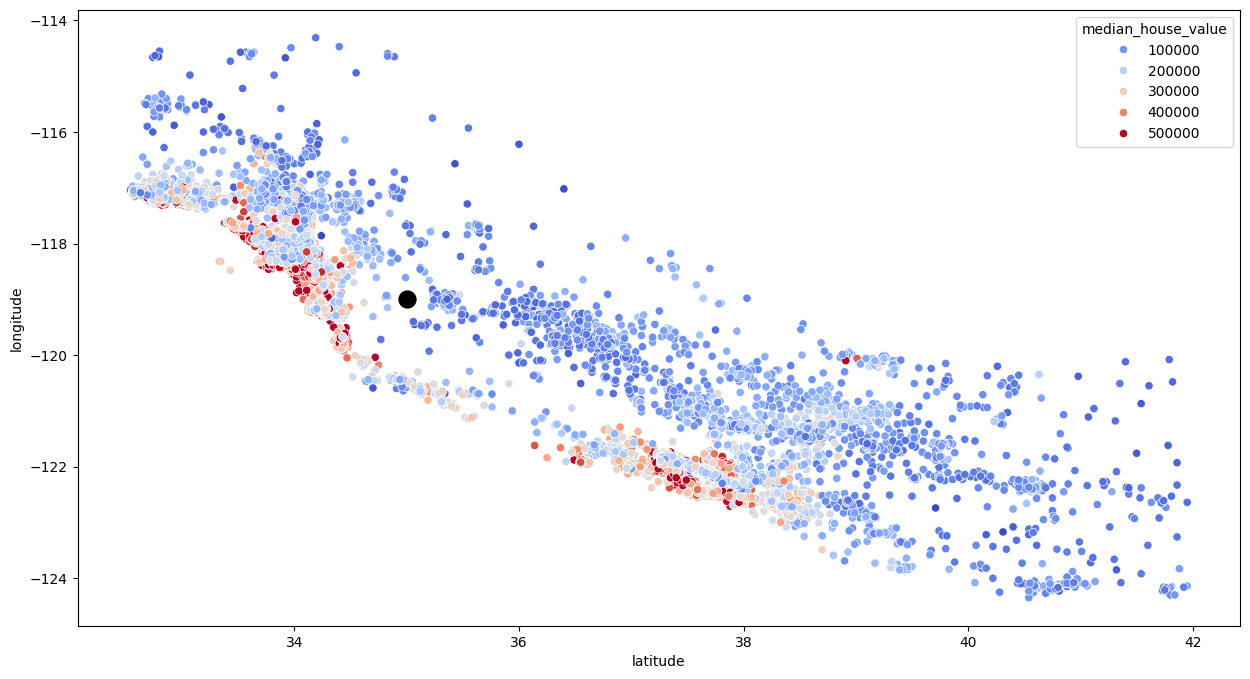

In [79]:
import pandas as pd
import numpy as np

# Example values for the new house
new_house = {
    'longitude': -119,
    'latitude': 35,
    'housing_median_age': 100,
    'total_rooms': 6,
    'total_bedrooms': 3,
    'population': np.nan,  # Placeholder for missing values
    'households': np.nan,  # Placeholder for missing values
    'median_income': np.nan,  # Placeholder for missing values
    '<1H OCEAN': 0,  # Example category
    'INLAND': 0,  # Example category
    'ISLAND': 0,  # Example category
    'NEAR BAY': 0,  # Example category
    'NEAR OCEAN': 0,  # Example category
    'bedroom_ratio': 3 / 6,  # Calculated based on provided values
    'household_rooms': 6 / 1,  # Calculated based on provided values
}

new_data = pd.DataFrame([new_house])

# Handle missing values
new_data.fillna(0, inplace=True)

# Scale the new data
new_data_scaled = Scaler.transform(new_data)

# Predict the house price
predicted_price = best_forest.predict(new_data_scaled)
print(f"The predicted house price is: {predicted_price[0]}")


plt.figure(figsize=(15, 8))
sns.scatterplot(x="latitude", y="longitude",data=train_data, hue='median_house_value',palette='coolwarm')
plt.scatter(new_data['latitude'], new_data['longitude'], color='black', s=200, label='New Prediction', edgecolor='white')


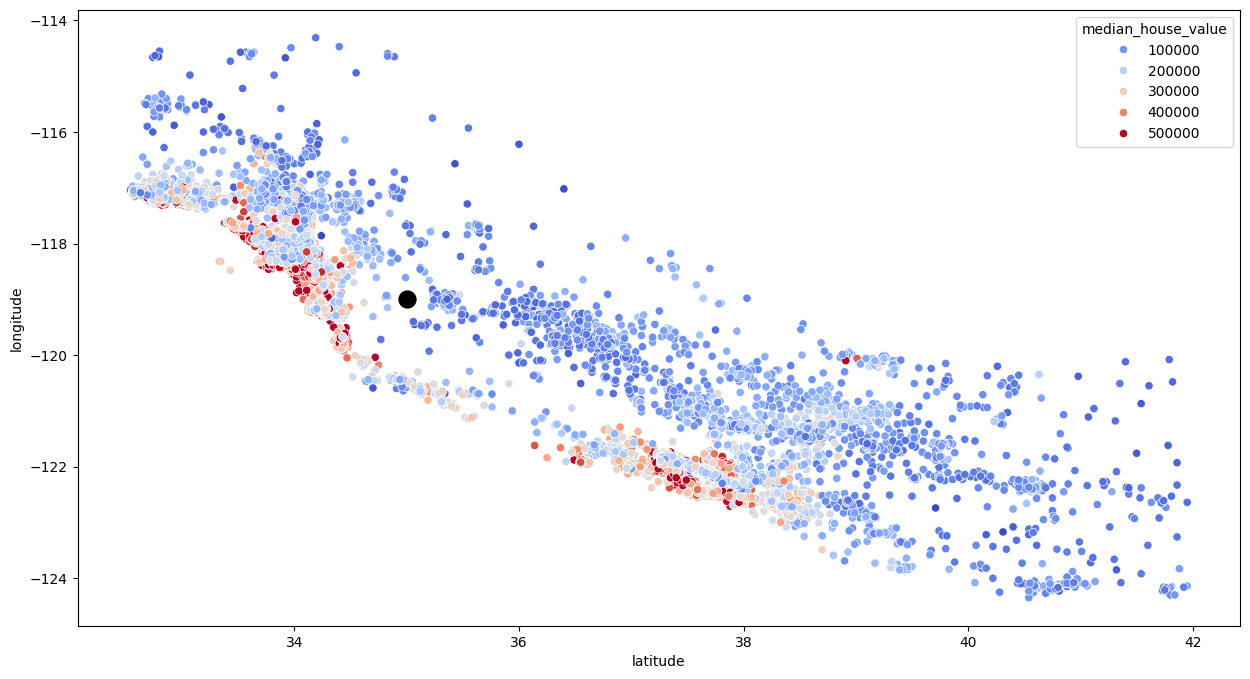

In [78]:

plt.figure(figsize=(15, 8))
sns.scatterplot(x="latitude", y="longitude",data=train_data, hue='median_house_value',palette='coolwarm')
plt.scatter(new_data['latitude'], new_data['longitude'], color='black', s=200, label='New Prediction', edgecolor='white')
